<a href="https://colab.research.google.com/github/KerollinDiniz/Estat-stica-com-Python/blob/main/Kerollin_Nogueira_Desafio_Probabilidade_e_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Impotar bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
# Importar bibliotecas para estatística
import scipy.stats as stat
from scipy.stats import zscore
from scipy import stats
from scipy.stats import geom
from scipy.stats import binom

In [ ]:
df_populacaobr = pd.read_csv('populacao_brasileira.csv', index_col=0)

In [ ]:
df_populacaobr.head(20) #primeiros 5 dados da tabela

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
5,AM,38,Fundamental,Avançado,4441.57,F
6,DF,56,Médio,Intermediário,528.36,F
7,DF,36,Superior,Avançado,2203.10,F
8,PI,40,Fundamental,Básico,3577.07,F
9,AP,28,Superior,Avançado,2796.95,M


In [ ]:
df_populacaobr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
df_populacaobr.shape #número de linhas e colunas

(1000, 6)

In [ ]:
df_populacaobr.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quemtemonível avançado.

(nãofluente)=1−P(fluente)

In [ ]:
qtd_pessoas = len(df_populacaobr) #Quantas pessoas tem na base

In [ ]:
qtd_fluente_ingles = df_populacaobr[df_populacaobr['nível de proficiência em inglês'] == 'Avançado'].shape[0] #Qtd de clpessoas fluentes

#Calcular a probabilidade de ser fluente
prob_fluente = qtd_fluente_ingles / qtd_pessoas

#Calcular a probabilidade complementar
prob_nao_fluente = (1 - prob_fluente)
print(f'A probabilidade cde não ser fluente em inglês:{prob_nao_fluente:.2%}')

A probabilidade cde não ser fluente em inglês:65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
#Selecionar pessoas de Alagoas ou Pará
qtd_pessoas_al_pa = df_populacaobr[(df_populacaobr['estado'] == 'AL') | (df_populacaobr['estado'] == 'PA')]

total_pessoas_al_pa = len(qtd_pessoas_al_pa)
print(total_pessoas_al_pa)

79


In [ ]:
# Contar quantas dessas pessoas têm renda superior a 5 mil reais
qtd_pessoas_renda_superior_5000 = qtd_pessoas_al_pa[qtd_pessoas_al_pa['renda'] > 5000]

total_pessoas_renda_superior_5000 = len(qtd_pessoas_renda_superior_5000)
print(total_pessoas_renda_superior_5000)

4


In [ ]:
#Calcular a probabilidade
probabilidade = total_pessoas_renda_superior_5000 / total_pessoas_al_pa
print(f'A probabilidade de uma pessoa de Alagoas ou do Pará ter renda superior a 5 mil reais é de {round(probabilidade * 100, 2)}%.')

A probabilidade de uma pessoa de Alagoas ou do Pará ter renda superior a 5 mil reais é de 5.06%.


3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
qtd_pessoas_am = df_populacaobr[df_populacaobr['estado'] == 'AM']

total_pessoas_am = len(qtd_pessoas_am)

# Contar quantas pessoas têm ensino superior completo da qtd total de pessoas do AM
pessoas_superior_completo = qtd_pessoas_am[(qtd_pessoas_am['escolaridade'] == 'Superior')|(qtd_pessoas_am['escolaridade'] == 'Pós-graduação')]

total_pessoas_superior_completo = len(pessoas_superior_completo)

# Calcular a probabilidade
probabilidade_superior_am = total_pessoas_superior_completo / total_pessoas_am

print(f'A probabilidade de uma pessoa do AM ter ensino superior completo é de {round(probabilidade_superior_am * 100, 2)}%.')

A probabilidade de uma pessoa do AM ter ensino superior completo é de 55.26%.


3.1 Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

### **P(X=k)=(1−p)(k−1)×p**

In [ ]:
p = len(df_populacaobr[df_populacaobr['estado'] == 'AM']) / len(df_populacaobr)
prob_quinta_pessoa = stats.geom.pmf(k=5, p=probabilidade_superior_am)
print(f'Probabilidade da quinta pessoa amazonense ter ensino completo é de: {prob_quinta_pessoa:.2%}')

Probabilidade da quinta pessoa amazonense ter ensino completo é de: 2.21%


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

Faixa de renda predominante: 3000 - 4500


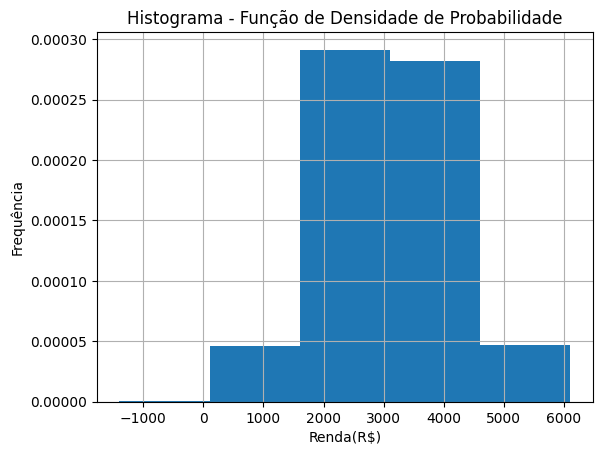

In [ ]:
intervalo = 1500
faixas_renda = np.arange(df_populacaobr['renda'].min() - intervalo, df_populacaobr['renda'].max() + intervalo, intervalo)
contagem_por_faixa, _ = np.histogram(df_populacaobr['renda'], bins=faixas_renda)

faixa_maioria = np.argmax(contagem_por_faixa) * intervalo
print("Faixa de renda predominante:", faixa_maioria, "-", faixa_maioria + intervalo)
#faixa_minima = faixas_renda[faixa_maioria]
#faixa_maxima = faixas_renda[faixa_maioria +1]



plt.hist(df_populacaobr['renda'], bins=faixas_renda, density=True)
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda(R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [ ]:
media_renda = np.mean(df_populacaobr['renda'])
variancia_renda = np.var(df_populacaobr['renda'])

print(f'Média da renda: {media_renda:.2f}')
print(f'Variância da renda: {variancia_renda:.2f}')


Média da renda: 3082.54
Variância da renda: 992163.07


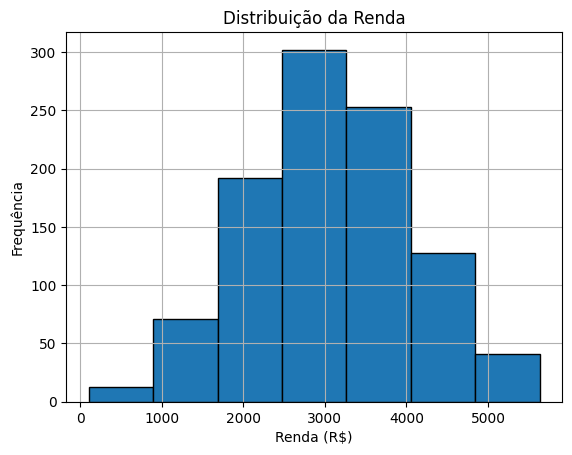

In [ ]:
plt.hist(df_populacaobr['renda'], bins=7, edgecolor='black')

plt.title('Distribuição da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
pessoas_pos_graduacao = len(df_populacaobr[df_populacaobr['escolaridade'] == 'Pós-graduação']) / len(df_populacaobr)
pessoas_pos_graduacao

0.253

In [ ]:
n = 1000000
k= 243000

In [ ]:
prob_pos_grad = stats.binom.pmf(k, n, pessoas_pos_graduacao)
print(f'Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {prob_pos_grad}')

Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: 1.1104854289794913e-119


7. Somando as densidades nós temos a função dedensidadeacumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
verificar_qtd_escolaridade = df_populacaobr['escolaridade'].value_counts(normalize=True).sort_index()
densidade_acumulada_escolaridade = verificar_qtd_escolaridade.cumsum()

print("Função de densidade acumulada discreta para cada nível de escolaridade:")
print(densidade_acumulada_escolaridade)

Função de densidade acumulada discreta para cada nível de escolaridade:
escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: proportion, dtype: float64


8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [ ]:
proporcao_pessoas_ingles_intermediario = len(df_populacaobr[df_populacaobr['nível de proficiência em inglês'] == 'Intermediário']) / len(df_populacaobr)
nivel_confianca = 0.95

z = 1.96
n = len(df_populacaobr)

margem_erro = z * np.sqrt((proporcao_pessoas_ingles_intermediario * (1 - proporcao_pessoas_ingles_intermediario)) / n)

print(f'A margem de erro é: {margem_erro:}')

A margem de erro é: 0.029121603225097343


9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com umarendamil reais superior à média?

In [ ]:
#Calcular a média da renda
media_renda = np.mean(df_populacaobr['renda'])

#Calcular a proporção de pessoas com renda superior à média
proporcao_pessoas_renda_superior_media = len(df_populacaobr[df_populacaobr['renda'] > media_renda]) / len(df_populacaobr)

n = len(df_populacaobr)
k = 60

probabilidade_60_superior_media = binom.pmf(k, n, proporcao_pessoas_renda_superior_media)


print(f'A probabilidade de encontrar 60 pessoas com renda superior à média é: {probabilidade_60_superior_media:.2f}')


A probabilidade de encontrar 60 pessoas com renda superior à média é: 0.00


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e comrendamaior que2mil reais por mês?

In [ ]:

# Verificar pessoas do Sudeste, homem, ensino fund e com renda > 2k
df_populacaoselecionada = df_populacaobr[
    (df_populacaobr['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &
    (df_populacaobr['sexo'] == 'M') &
    (df_populacaobr['escolaridade'] == 'Fundamental') &
    (df_populacaobr['renda'] > 2000)
]

print(df_populacaoselecionada)
#prob_pessoas_selecionadas = (len(df_populacaoselecionada)) / (len(df_populacaobr))

#print(f'A probabilidade é: {prob_pessoas_selecionadas:.2f}')

    estado  idade escolaridade nível de proficiência em inglês    renda sexo
155     ES     32  Fundamental                   Intermediário  3615.94    M
163     ES     45  Fundamental                          Básico  4049.01    M
205     ES     19  Fundamental                        Avançado  3026.09    M
301     SP     50  Fundamental                        Avançado  2786.01    M
505     SP     18  Fundamental                          Básico  2961.49    M
524     MG     27  Fundamental                   Intermediário  4148.77    M
612     RJ     19  Fundamental                   Intermediário  2008.61    M
626     RJ     21  Fundamental                   Intermediário  4022.57    M
680     ES     29  Fundamental                   Intermediário  2164.65    M
732     MG     50  Fundamental                   Intermediário  4091.31    M
773     MG     18  Fundamental                          Básico  3817.77    M
775     MG     22  Fundamental                   Intermediário  3557.81    M

In [ ]:
prob_pessoas_selecionadas = (len(df_populacaoselecionada)) / (len(df_populacaobr))

print(f'A probabilidade é: {prob_pessoas_selecionadas:.2f}')

A probabilidade é: 0.02


In [ ]:
df_populacaobr.head(20) #primeiros 5 dados da tabela

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M
5,AM,38,Fundamental,Avançado,4441.57,F
6,DF,56,Médio,Intermediário,528.36,F
7,DF,36,Superior,Avançado,2203.10,F
8,PI,40,Fundamental,Básico,3577.07,F
9,AP,28,Superior,Avançado,2796.95,M
